### Installations

In [ ]:
%pip install sdv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.0/149.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 4.8 MB/s eta 0:00:00


### Loading

In [ ]:
import pandas as pd
from sdv.single_table import CTGANSynthesizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/RIS/Synthetic_Data/Patient_no_show_filtered_data.csv'
real_data = pd.read_csv(file_path)

In [ ]:
model_file_path = '/content/drive/My Drive/RIS/Synthetic_Data/sdv_ctgan_model.pkl'
synthesizer = CTGANSynthesizer.load(
    filepath=model_file_path
)

/usr/local/lib/python3.10/dist-packages/sdv/_utils.py:289: SDV Version Warning: You are currently on SDV version 1.16.2 but this synthesizer was created on version 1.16.1. The latest bug fixes and features may not be available for this synthesizer. To see these enhancements, create and train a new synthesizer on this version.
  warnings.warn(message, SDVVersionWarning)


In [ ]:
synthesizer.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': True,
 'locales': ['en_US'],
 'embedding_dim': 128,
 'generator_dim': (256, 256),
 'discriminator_dim': (256, 256),
 'generator_lr': 0.0002,
 'generator_decay': 1e-06,
 'discriminator_lr': 0.0002,
 'discriminator_decay': 1e-06,
 'batch_size': 500,
 'discriminator_steps': 1,
 'log_frequency': True,
 'verbose': False,
 'epochs': 500,
 'pac': 10,
 'cuda': True}

In [ ]:
synthetic_data = synthesizer.sample(num_rows=5000)

# save the data as a CSV
csv_path = '/content/drive/My Drive/RIS/Synthetic_Data/No_Show_Synthetic_Data.csv'
synthetic_data.to_csv(csv_path, index=False)

In [ ]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

In [ ]:
metadata.detect_from_dataframe(real_data)

In [ ]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 10/10 [00:00<00:00, 60.49it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 124.31it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [ ]:
diagnostic_report.get_details(property_name='Data Validity')

,Column,Metric,Score
0,Gender,CategoryAdherence,1.0
1,Age,BoundaryAdherence,1.0
2,WaitingTime,BoundaryAdherence,1.0
3,Scholarship,CategoryAdherence,1.0
4,Hipertension,CategoryAdherence,1.0
5,Diabetes,CategoryAdherence,1.0
6,Alcoholism,CategoryAdherence,1.0
7,Handcap,CategoryAdherence,1.0
8,SMS_received,CategoryAdherence,1.0
9,No-show,CategoryAdherence,1.0


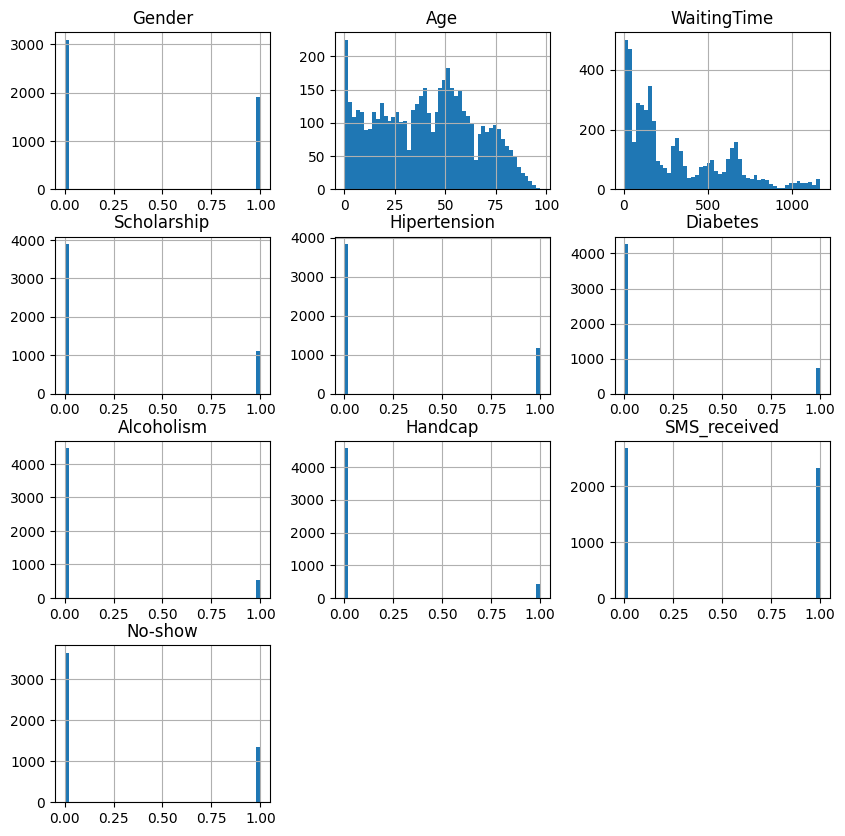

In [ ]:
import matplotlib.pyplot as plt
synthetic_data.hist(figsize = (10,10) , bins = 50)
plt.show()


In [ ]:
synthetic_data

,Gender,Age,WaitingTime,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,30,113.304348,1,0,0,0,1,0,0
1,0,47,152.391843,1,0,0,0,0,1,0
2,1,31,168.742876,0,0,0,0,0,1,1
3,0,85,116.670574,0,0,0,0,0,0,0
4,0,58,168.382482,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
4995,1,76,133.817532,0,0,0,0,0,0,0
4996,1,34,79.677147,1,0,0,0,0,1,1
4997,1,47,773.850294,0,0,0,0,0,0,1
4998,1,0,3.272222,0,0,0,0,0,0,0


from matplotlib import pyplot as plt
synthetic_data['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
synthetic_data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
synthetic_data['WaitingTime'].plot(kind='hist', bins=20, title='WaitingTime')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
synthetic_data['Scholarship'].plot(kind='hist', bins=20, title='Scholarship')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
synthetic_data.plot(kind='scatter', x='Gender', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
synthetic_data.plot(kind='scatter', x='Age', y='WaitingTime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
synthetic_data.plot(kind='scatter', x='WaitingTime', y='Scholarship', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
synthetic_data.plot(kind='scatter', x='Scholarship', y='Hipertension', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WaitingTime']
  ys = series['Gender']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = synthetic_data.sort_values('WaitingTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('WaitingTime')
_ = plt.ylabel('Gender')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WaitingTime']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = synthetic_data.sort_values('WaitingTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('WaitingTime')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WaitingTime']
  ys = series['Scholarship']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = synthetic_data.sort_values('WaitingTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('WaitingTime')
_ = plt.ylabel('Scholarship')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WaitingTime']
  ys = series['Hipertension']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = synthetic_data.sort_values('WaitingTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('WaitingTime')
_ = plt.ylabel('Hipertension')

from matplotlib import pyplot as plt
synthetic_data['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
synthetic_data['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
synthetic_data['WaitingTime'].plot(kind='line', figsize=(8, 4), title='WaitingTime')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
synthetic_data['Scholarship'].plot(kind='line', figsize=(8, 4), title='Scholarship')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
real_data

,Gender,Age,WaitingTime,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,76,39.385833,0,1,0,0,0,0,0
1,0,23,32.913333,0,0,0,0,0,0,1
2,0,39,32.333889,0,0,0,0,0,0,1
3,0,19,35.193056,0,0,0,0,0,0,0
4,0,30,33.030278,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
68477,0,56,830.740278,0,0,0,0,0,1,0
68478,0,51,832.540833,0,0,0,0,0,1,0
68479,0,21,967.935556,0,0,0,0,0,1,0
68480,0,38,968.843611,0,0,0,0,0,1,0


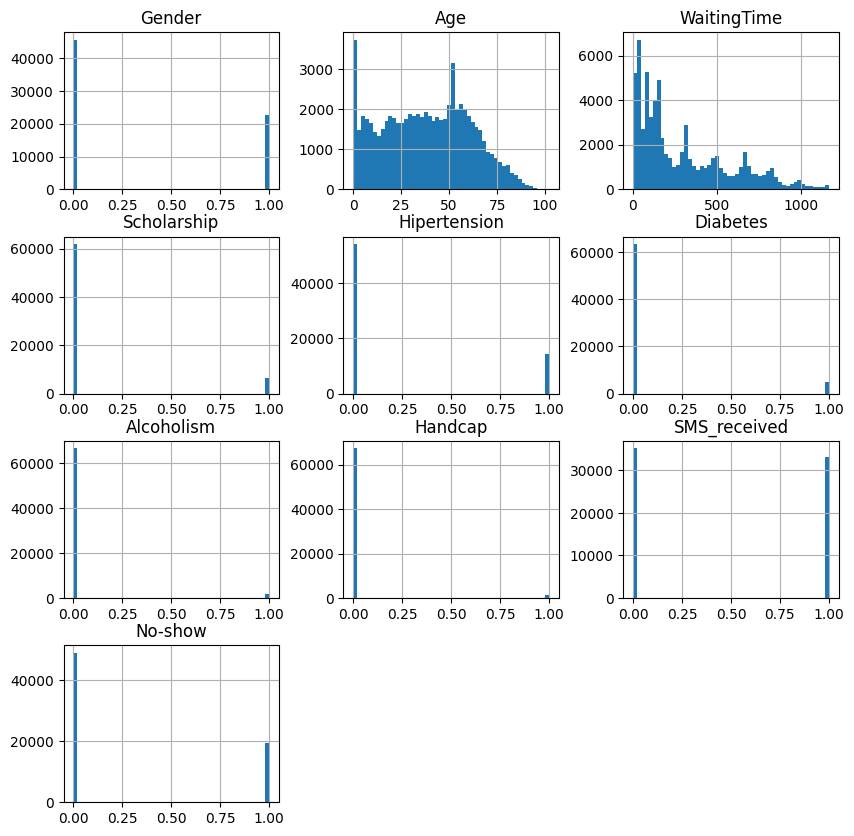

In [ ]:
real_data.hist(figsize = (10,10) , bins = 50)
plt.show()

### Testing

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def test_model_score(  y_test , y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1 Score: ', f1)

In [ ]:
selected_features = ["Gender" , "Age" , "WaitingTime" , "Scholarship" , "SMS_received" , "No-show"]

In [ ]:
selected_data_set_real = real_data[selected_features]
selected_data_set_synth = synthetic_data[selected_features]

In [ ]:
# Normalize the data
selected_data_set_real = (selected_data_set_real - selected_data_set_real.min()) / (selected_data_set_real.max() - selected_data_set_real.min())
selected_data_set_synth = (selected_data_set_synth - selected_data_set_synth.min()) / (selected_data_set_synth.max() - selected_data_set_synth.min())


In [ ]:
# split the data into training, testing and validation sets
training_data_real = selected_data_set_real.sample(frac = 0.7 , random_state=42)
validation_data_real = selected_data_set_real.drop(training_data_real.index)
testing_data_real = validation_data_real.sample(frac = 0.5, random_state=42)
validation_data_real = validation_data_real.drop(testing_data_real.index)

training_data_real.shape , validation_data_real.shape , testing_data_real.shape

((47937, 6), (10273, 6), (10272, 6))

In [ ]:
X_train_real = training_data_real.drop(columns=['No-show'])
y_train_real = training_data_real['No-show']

X_val_real = validation_data_real.drop(columns=['No-show'])
y_val_real = validation_data_real['No-show']

X_test_real = testing_data_real.drop(columns=['No-show'])
y_test_real = testing_data_real['No-show']

In [ ]:
# split the data into training, testing and validation sets
training_data_synth = selected_data_set_synth.sample(frac = 0.7 , random_state=42)
validation_data_synth = selected_data_set_synth.drop(training_data_synth.index)
testing_data_synth = validation_data_synth.sample(frac = 0.5, random_state=42)
validation_data_synth = validation_data_synth.drop(testing_data_synth.index)

training_data_synth.shape , validation_data_synth.shape , testing_data_synth.shape

((3500, 6), (750, 6), (750, 6))

In [ ]:
X_train_synth = training_data_synth.drop(columns=['No-show'])
y_train_synth = training_data_synth['No-show']

X_val_synth = validation_data_synth.drop(columns=['No-show'])
y_val_synth = validation_data_synth['No-show']

X_test_synth = testing_data_synth.drop(columns=['No-show'])
y_test_synth = testing_data_synth['No-show']

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Hyper parameters
n_estimators=100
max_depth=5
learning_rate=0.1
objective='binary:logistic'
verbosity = 1
reg_alpha = 0.5
reg_lambda = 0.01

In [ ]:
# create model instance
bst_real = XGBClassifier()
# fit model
bst_real.fit(X_train_real, y_train_real)
# make predictions
preds_real = bst_real.predict(X_val_real)

In [ ]:
test_model_score(preds_real,y_val_real)

Accuracy:  0.7173172393653265
Precision:  0.008984105044920525
Recall:  0.41935483870967744
F1 Score:  0.017591339648173207


In [ ]:
# create model instance
bst_synth = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, objective=objective , verbosity = verbosity , reg_alpha = reg_alpha , reg_lambda = reg_lambda)
# fit model
bst_synth.fit(X_train_synth, y_train_synth)
# make predictions
preds_synth = bst_synth.predict(X_val_synth)

In [ ]:
test_model_score(preds_synth,y_val_synth)

Accuracy:  0.704
Precision:  0.11267605633802817
Recall:  0.42105263157894735
F1 Score:  0.17777777777777778


In [ ]:
preds_synth_real = bst_synth.predict(X_val_real) # True values as i/p
preds_real_synth = bst_real.predict(X_val_synth) # Synthetic values as i/p
print("Model : Synthetic | I/P :Real")
test_model_score(preds_synth_real , y_val_real)
print("\nModel : Real | I/P :Synthetic")
test_model_score(preds_real_synth , y_val_synth)

Model : Synthetic | I/P :Real
Accuracy:  0.6994062104545897
Precision:  0.08707671043538355
Recall:  0.36103151862464183
F1 Score:  0.1403118040089087

Model : Real | I/P :Synthetic
Accuracy:  0.72
Precision:  0.023474178403755867
Recall:  0.7142857142857143
F1 Score:  0.045454545454545456


In [ ]:
#dir(preds_real)
probs = bst_synth.predict_proba(X_val_real)

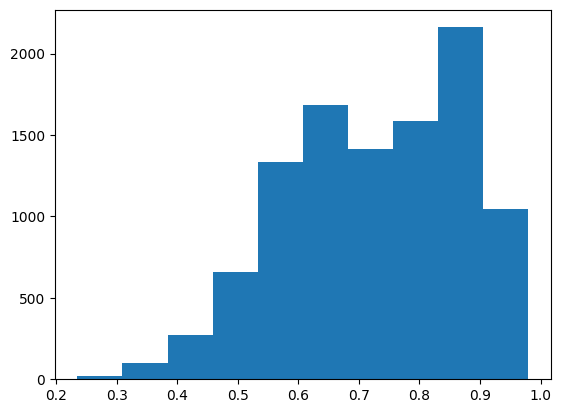

In [ ]:
import matplotlib.pyplot as plt
plt.hist(probs[:,0])
plt.show()


In [ ]:
# Include weather conditions, more interactive ui , give the probability of no-show, check all failure points, write an exe file as a software, update from time to time, Ensembling with multiple models

In [ ]:
preds_real_val = bst_real.predict(X_val_real)
preds_real_test = bst_real.predict(X_test_real)

In [ ]:
print("Validation")
test_model_score(preds_real_val , y_val_real)
print("Testing")
test_model_score(preds_real_test , y_test_real)

Validation
Accuracy:  0.7173172393653265
Precision:  0.008984105044920525
Recall:  0.41935483870967744
F1 Score:  0.017591339648173207
Testing
Accuracy:  0.7168029595015576
Precision:  0.01167181599725369
Recall:  0.53125
F1 Score:  0.022841787033926773
